In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random 

По заданной ниже выборке $(x_i, y_i)$ объема n=50 и уровню значимости $a=0.25$ определить уравнение линейной регрессии в базисе $\{x,x^2,\sqrt{x}\}$.

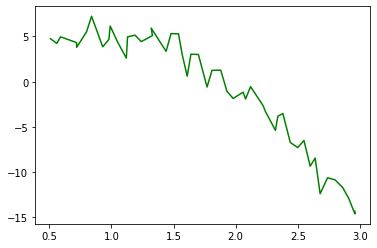

In [8]:
x = np.array([0.51,0.56,0.59,0.61,0.72,0.72,0.8,0.84,0.93,0.98,0.99,
                1.05,1.12,1.13,1.19,1.24,1.33,1.32,1.44,1.48,1.54,1.57,1.61,1.64,1.7,1.77,1.81,1.88,1.93,1.98,
                2.06,2.08,2.12,2.22,2.24,2.32,2.34,2.38,2.44,2.5,2.55,2.6,2.64,2.68,2.74,2.8,2.86,2.91,2.96,2.96])
y = np.array([4.75,4.24,4.96,4.87,4.32,3.8,5.52,7.24,3.86,4.68,6.16,4.38,2.61,4.96,5.15,4.43,5.1,5.93,3.36,
              5.32,5.29,2.99,0.61,3.04,3.01,-0.59,1.26,1.27,-1.06,-1.86,-1.16,-1.91,-0.55,-2.63,-3.3,-5.38,
              -3.82,-3.52,-6.73,-7.29,-6.51,-9.35,-8.45,-12.4,-10.63,-10.86,-11.68,-12.9,-14.63,-14.34])
n = len (x)
p = 3 # число базисных функций
plt.plot(x, y, 'g');

Где X - координаты
    Y - вектор отклика

<img src="q.png" width=500 height=500 />

## Определим степень корреляции вектора отклика от координат

<img src="cor.png" width=500 height=500 />

In [9]:
def average(x):
    return sum(x)/len(x)

def tmp_sum(x, average, power):
    tmp = 0
    for i in range(0, len(x)):
        tmp += pow(x[i] - average, power)
    return tmp
        
def correlation_coefficient(x, y):
    tmp = 0
    x_av = average(x)
    y_av = average(y)
    for i in range(0, len(x)):
        tmp += (x[i] - x_av)*(y[i] - y_av)
    return abs(tmp/np.sqrt(tmp_sum(x, x_av, 2)*tmp_sum(y, y_av, 2)))
    
print(correlation_coefficient(x,y))

0.9211335699280324


Статистически значимо при (доверительный интервал): $$|r|>=th(\frac{U_a}{\sqrt{n-p}})$$

In [10]:
#Quantile[NormalDistribution[0,1], 0.975] = 1.95996
print(np.tanh(1.95996/np.sqrt(50-3)))

0.2783471823538262


0.921 > 0.278 => коэфициент кореляции значим

## Определим уравнение линейной регрессии

Запишем матрицу наблюдения PSI

In [11]:
PSI = (x, [t*t for t in x], [np.sqrt(t) for t in x])
PSI = np.array(PSI).transpose()
Y = y.transpose()

In [12]:
PSI[:10,:]

array([[0.51      , 0.2601    , 0.71414284],
       [0.56      , 0.3136    , 0.74833148],
       [0.59      , 0.3481    , 0.76811457],
       [0.61      , 0.3721    , 0.78102497],
       [0.72      , 0.5184    , 0.84852814],
       [0.72      , 0.5184    , 0.84852814],
       [0.8       , 0.64      , 0.89442719],
       [0.84      , 0.7056    , 0.91651514],
       [0.93      , 0.8649    , 0.96436508],
       [0.98      , 0.9604    , 0.98994949]])

Найдем оценку коэфициентов регрессии:

In [13]:
F = np.matmul(PSI.transpose(),PSI)

F_1 = np.linalg.inv(F)
#print(F_1)
_betta = np.matmul(F_1,PSI.transpose())
#print(_betta)
_betta = np.matmul(_betta,Y)
print("y =",_betta[0],"*x +",_betta[1],"*x^2 +",_betta[2],"*sqrt(x)")

y = 5.615056660921895 *x + -4.288844412939436 *x^2 + 3.7785582876911454 *sqrt(x)


## Посчитаем остаточную сумму квадратов и оценку погрешности:

RSS - MSE, которая не описывается полученной функцией (обычно случайный шум)

In [14]:
RSS = np.matmul((Y-np.matmul(PSI,_betta)).transpose(),(Y-np.matmul(PSI,_betta)))
print("RSS = ",RSS)

RSS =  60.72138776086695


$\sigma^2$ - Оценка среднеквадратичного отклонения.

In [15]:
sigma = RSS/(n - p)
print("sigma = ",sigma)

sigma =  1.2919444204439778


## Убедимся в значимости всей функции регрессии:

MSE, которая не описывается полученной функцией (обычно случайный шум)

In [16]:
sum((Y-average(Y))*(Y-average(Y)))

1997.159928

In [17]:
RSS_1 = sum((Y-average(Y))*(Y-average(Y)))
print("Функция регрессии объясняет порядка",round((RSS_1-RSS)/RSS_1*100),"% разброса значений")

Функция регрессии объясняет порядка 97.0 % разброса значений


## Оценим значимость коэфициентов регрессии:

In [18]:
RSS = np.matmul((Y-np.matmul(PSI,_betta)).transpose(),(Y-np.matmul(PSI,_betta)))
print("RSS = ",RSS)
#  Quantile[StudentDistribution[47], 0.975] = 2.01174
t_a = 2.01174
print(" _betta_1 = ",abs(_betta[0]) ," >? " ,t_a*np.sqrt(RSS*F_1[0][0]/47),
      "\n _betta_2 = ",abs(_betta[1]) ," >? " ,t_a*np.sqrt(RSS*F_1[1][1]/47),
      "\n _betta_3 = ",abs(_betta[2]) ," >? " ,t_a*np.sqrt(RSS*F_1[2][2]/47))

RSS =  60.72138776086695
 _betta_1 =  5.615056660921895  >?  4.978511748803015 
 _betta_2 =  4.288844412939436  >?  0.9221180381546575 
 _betta_3 =  3.7785582876911454  >?  4.288320341782351


Значит, коэффициен при $\sqrt{x}$ - не является значимо отличимым от нуля

##  Доверительная полоса для уравнения реграссии

In [19]:
gamma = 0.95
def f_u(x):
    psi = np.array([x, x*x, np.sqrt(x)])
    return  5.615056660921928*x - 4.288844412939487*x**2 + 3.778558287691048*np.sqrt(x)\
                + 2.011*gamma*np.sqrt(RSS/47)*np.sqrt(1 + np.matmul(np.matmul(psi, F_1), psi.transpose()))
def f_d(x):
    psi = np.array([x, x*x, np.sqrt(x)])
    return  5.615056660921928*x - 4.288844412939487*x**2 + 3.778558287691048*np.sqrt(x)\
                - 2.011*gamma*np.sqrt(RSS/47)*np.sqrt(1 + np.matmul(np.matmul(psi, F_1), psi.transpose()))
def f(x):
    return  5.615056660921928*x - 4.288844412939487*x**2 + 3.778558287691048*np.sqrt(x)


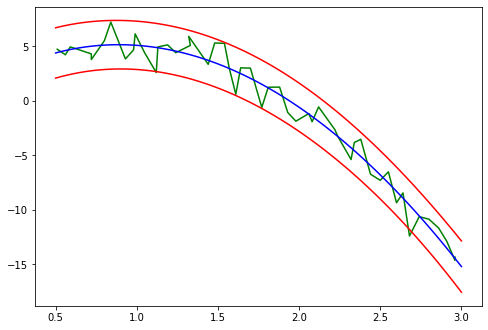

In [20]:
x = np.array([0.51,0.56,0.59,0.61,0.72,0.72,0.8,0.84,0.93,0.98,0.99,
                1.05,1.12,1.13,1.19,1.24,1.33,1.32,1.44,1.48,1.54,1.57,1.61,1.64,1.7,1.77,1.81,1.88,1.93,1.98,
                2.06,2.08,2.12,2.22,2.24,2.32,2.34,2.38,2.44,2.5,2.55,2.6,2.64,2.68,2.74,2.8,2.86,2.91,2.96,2.96])
y = np.array([4.75,4.24,4.96,4.87,4.32,3.8,5.52,7.24,3.86,4.68,6.16,4.38,2.61,4.96,5.15,4.43,5.1,5.93,3.36,
              5.32,5.29,2.99,0.61,3.04,3.01,-0.59,1.26,1.27,-1.06,-1.86,-1.16,-1.91,-0.55,-2.63,-3.3,-5.38,
              -3.82,-3.52,-6.73,-7.29,-6.51,-9.35,-8.45,-12.4,-10.63,-10.86,-11.68,-12.9,-14.63,-14.34])
xs = np.linspace(0.5,3,100)
F_u = np.vectorize(f_u)
F_d = np.vectorize(f_d)
F = np.vectorize(f)
plt.figure(figsize=(8,5.5))
plt.plot(x, y, 'g');
plt.plot(xs, F_u(xs), 'r');
plt.plot(xs, F_d(xs), 'r');
plt.plot(xs, F(xs), 'b');

## Удалим из базиса не значимую функцию

In [21]:
PSI = (x, [t*t for t in x])
PSI = np.array(PSI).transpose()
Y = y.transpose()
F = np.matmul(PSI.transpose(),PSI)

F_1 = np.linalg.inv(F)
#print(F_1)
_betta = np.matmul(F_1,PSI.transpose())
#print(_betta)
_betta = np.matmul(_betta,Y)
print("y = ",_betta[0],"*x + ",_betta[1],"*x^2")
#print(np.diag([1,2,3]))
RSS = np.matmul((Y-np.matmul(PSI,_betta)).transpose(),(Y-np.matmul(PSI,_betta)))
print("RSS = ",RSS)
#  Quantile[StudentDistribution[48], 0.975] = 2.01063
t_a = 2.01063
print(" _betta_1 = ",abs(_betta[0]) ," >? " ,t_a*np.sqrt(RSS*F_1[0][0]/48),
      "\n _betta_2 = ",abs(_betta[1]) ," >? " ,t_a*np.sqrt(RSS*F_1[1][1]/48))

y =  9.958479800940832 *x +  -5.058102016640299 *x^2
RSS =  64.7808204519242
 _betta_1 =  9.958479800940832  >?  0.7126331087317475 
 _betta_2 =  5.058102016640299  >?  0.30321225676941954


In [22]:
_sigm_2_2 = RSS/48
print("оценка дисперсии ошибок: ",_sigm_2_2)
# Quantile[Chi-squaredDistribution[48], 0.975] = 69.0226
print("RSS/b = ",RSS/69.0226, " <? ", _sigm_2_2, " <? ",RSS/30.7545)

оценка дисперсии ошибок:  1.3496004260817542
RSS/b =  0.9385450628044177  <?  1.3496004260817542  <?  2.106385096552511


In [23]:
RSS_1 = tmp_sum(y, average(y), 2)
y_model =  _betta[0] *x +  _betta[1] *x*x
tmp = 0
for i in range (0, len(x)):
    tmp += pow(y[i] - y_model[i], 2)
RSS_2 = tmp
R = (RSS_1 - RSS_2)/RSS_1

print("R = ", R)
# Quantile[f-Distribution[2,48],0.95] = 3.19073
print(R*(47)/2, " >? ", 3.19073)

R =  0.9675635288172454
22.737742927205268  >?  3.19073


## для p = 3 : R =0.9695961315318025 , для p = 2, R = 0.9675635288172454

## delta R = 0.0020326027145570746

## Проверка значимости Бутстрепом 

<img src="bootstrap.png" width=900 height=600 />

In [24]:
N = 50 
theta = 100 
selection = [] 
for i in range(N): 
    selection.append(np.random.uniform(0, theta)) 
    count = 0 
for i in range(len(selection)): 
    for j in range(i + 1, len(selection)): 
        if selection[i] > selection[j]: 
            count += 1 
G = (12*count - 3*N*(N-1))/np.sqrt(4*pow(N, 3)+6*N*N-10*N) 
print(G, ' < ', 2.32635)

-0.25931059081203883  <  2.32635


## значит числа случайные

In [25]:
def buildBootstrap(selection, size): 
    sel = [] 
    for i in range(size): 
        sel.append(0) 
        for j in range(len(selection)): 
            sel[i] += 2*selection[random.randint(0, len(selection) - 1)]/len(selection) 
    return sorted(sel)

In [26]:

def buildBootstrap(x, y, size): 
    res = [] 
    for _ in range(size): 
        n_x = [] 
        n_y = [] 
        for j in range(len(x)): 
            k = random.randint(0, len(x) - 1) 
            n_x.append(x[k]) 
            n_y.append(y[k]) 
        RSS1_tmp = 0 
        y_av_n = average(n_y) 
        for k in range(len(n_y)): 
            RSS1_tmp += (n_y[k] - y_av_n)*(n_y[k] - y_av_n) 
        y_model_tmp = [] 
        RSS2_tmp = 0 
        for i in range(len(n_y)): 
            y_model_tmp.append(_betta[0]*n_x[i] + _betta[1]*n_x[i]*n_x[i]) 
            RSS2_tmp += (y_model_tmp[i] - n_y[i])*(y_model_tmp[i] - n_y[i]) 
        res.append((RSS1_tmp - RSS2_tmp)/RSS1_tmp) 
    return sorted(res)
bbt = buildBootstrap(x, y, 1000)
print(bbt[25], " < ",0.9675635288172454," < ", bbt[975])

0.9482435459672722  <  0.9675635288172454  <  0.980022189638544


## Кросс-проверка в новом базисе

In [27]:
def regr(i):
    _x = []
    _y = []
    for index in range(len(x)):
        if(index != i):
            _x.append(x[index])
            _y.append(y[index])
    PSI = (_x, [t*t for t in _x])
    PSI = np.array(PSI).transpose()
    F = np.matmul(PSI.transpose(),PSI)

    F_1 = np.linalg.inv(F)
    #print(F_1)
    _betta = np.matmul(F_1,PSI.transpose())
    #print(_betta)
    _betta = np.matmul(_betta,_y)
    return _betta

dif = 0
for index in range(len(x)):
    betta = regr(index)
    dif += (y[index] - (x[index]*betta[0] + x[index]*x[index]*betta[1]))**2
R = (RSS_1 - dif)/RSS_1
print (R)
    

0.964863376029446
